In [29]:
# import libraries

import seaborn as sns
import pandas as pd
import numpy as np
#from datasets import list_datasets, load_dataset # hugging face dataset
from pprint import pprint
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.utils import resample
import random
import torch
RANDOM_SEED = 42
random.seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)
torch.manual_seed(RANDOM_SEED)
torch.cuda.manual_seed_all(RANDOM_SEED)

import os
import glob
import sys
sys.path.append(os.path.dirname((os.path.abspath(''))))

from datasets import list_datasets, load_dataset
from pprint import pprint

Colab craches skip this for now

In [30]:
hate_speech = pd.read_csv("./train_tweet.csv", sep=',') #
hate_speech.head()#load_dataset("tweets_hate_speech_detection")

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [31]:
df_hate_speech = hate_speech
df_hate_speech.shape

(31962, 3)

In [25]:
df_hate_speech['label'].value_counts()

0    29720
1     2242
Name: label, dtype: int64

In [32]:
df_hate_speech["tweet"]
tweet_df = df_hate_speech.sort_values(by='tweet', ascending=False)
tweet_df

,id,label,tweet
29615,29616,0,ó¾­© duchess ó¾ roxie sinesh ó¾­© â½ #sup...
8385,8386,0,ó¾¬¥ó¾ó¾¬ó¾­ #daughter @user just got #gra...
22314,22315,0,ó¾¬chill time with my fave guilty pleasure an...
11031,11032,0,ó¾¬ó¾¬ó¾¬ love you. ó¾¬ó¾¬ó¾¬ . #sunday ...
4739,4740,0,ó¾ð»ó¾ð»ó¾ð» #sunday #relax #fu...
...,...,...,...
19126,19127,0,#fathersday to all the the #dads and to my ...
18879,18880,0,#bihday on 29/6 44 where has the time gone xx
30673,30674,0,"#90th bihday to #her #majesty the #queen, q..."
8611,8612,0,what you conjure up a smile today?


In [33]:
data = df_hate_speech

C:\Users\D073999\Miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


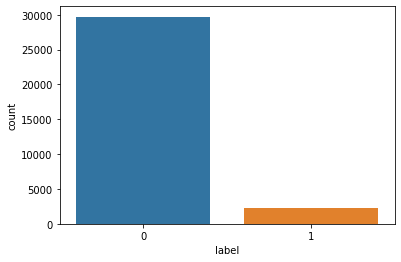

In [34]:
#https://medium.com/analytics-vidhya/twitter-sentiment-analysis-8ef90df6579c
import seaborn as sns
ax=sns.countplot(data.label);

In [35]:
# removing usernames from tweet
data['new_tweet'] = data.tweet.str.replace('@user', '')
data.head()

,id,label,tweet,new_tweet
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause th...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation,factsguide: society now #motivation


In [11]:
!pip install emoji
import emoji

Looking in indexes: https://int.repositories.cloud.sap/artifactory/api/pypi/build-releases-pypi/simple, https://int.repositories.cloud.sap/artifactory/api/pypi/build-milestones-pypi/simple


You should consider upgrading via the 'c:\users\d073999\miniconda3\python.exe -m pip install --upgrade pip' command.


In [36]:
#Removing Punctuations, Numbers, and Special Characters
#[a-zA-Z] = Any single character in the range a-z or A-Z
# ^ = Start of line 
# $ = End of line
#data["new_tweet"] = data["new_tweet"].str.replace("[^a-zA-Z#]", " ")
data["new_tweet"] = data["new_tweet"].str.replace("#", " ")
data.head()

,id,label,tweet,new_tweet
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for lyft credit i can't use cause th...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation,factsguide: society now motivation


In [37]:
# rm html tags
import re as re

data['new_tweet'] = data['new_tweet'].apply(lambda t: re.sub('<.*?>','',t)) 

In [38]:
data['new_tweet'] = data['new_tweet'].apply(lambda t: emoji.demojize(t.lower(), language='en'))
data.head(30)

,id,label,tweet,new_tweet
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for lyft credit i can't use cause th...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation,factsguide: society now motivation
5,6,0,[2/2] huge fan fare and big talking before the...,[2/2] huge fan fare and big talking before the...
6,7,0,@user camping tomorrow @user @user @user @use...,camping tomorrow dannyâ¦
7,8,0,the next school year is the year for exams.ð...,the next school year is the year for exams.ð...
8,9,0,we won!!! love the land!!! #allin #cavs #champ...,we won!!! love the land!!! allin cavs champ...
9,10,0,@user @user welcome here ! i'm it's so #gr...,welcome here ! i'm it's so gr8 !


In [ ]:
!pip install autocorrect

     |████████████████████████████████| 622 kB 20.0 MB/s 
  Created wheel for autocorrect: filename=autocorrect-2.6.1-py3-none-any.whl size=622382 sha256=e4c816e7092ece6cc4c3a6c77f2eccaf4bf07a637317263977906d06c9e714d4
  Stored in directory: /root/.cache/pip/wheels/54/d4/37/8244101ad50b0f7d9bffd93ce58ed7991ee1753b290923934b
Successfully built autocorrect


In [ ]:
from autocorrect import Speller
data['new_tweet'] = data['new_tweet'].apply(lambda t: Speller(t))
data

ModuleNotFoundError: ignored

In [39]:
#tokenization
data["new_tweet"] = data["new_tweet"].apply(lambda x: x.split())
data.head()

,id,label,tweet,new_tweet
0,1,0,@user when a father is dysfunctional and is s...,"[when, a, father, is, dysfunctional, and, is, ..."
1,2,0,@user @user thanks for #lyft credit i can't us...,"[thanks, for, lyft, credit, i, can't, use, cau..."
2,3,0,bihday your majesty,"[bihday, your, majesty]"
3,4,0,#model i love u take with u all the time in ...,"[model, i, love, u, take, with, u, all, the, t..."
4,5,0,factsguide: society now #motivation,"[factsguide:, society, now, motivation]"


In [40]:
#stemmer
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")
data["new_tweet"]= data["new_tweet"].apply(lambda x: [stemmer.stem(i) for i in x])
data.head()

,id,label,tweet,new_tweet
0,1,0,@user when a father is dysfunctional and is s...,"[when, a, father, is, dysfunct, and, is, so, s..."
1,2,0,@user @user thanks for #lyft credit i can't us...,"[thank, for, lyft, credit, i, can't, use, caus..."
2,3,0,bihday your majesty,"[bihday, your, majesti]"
3,4,0,#model i love u take with u all the time in ...,"[model, i, love, u, take, with, u, all, the, t..."
4,5,0,factsguide: society now #motivation,"[factsguide:, societi, now, motiv]"


In [42]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words("english")
import string
def process(text):
    # Check characters to see if they are in punctuation
    nopunc = set(char for char in list(text) if char not in string.punctuation)
    # Join the characters to form the string.
    nopunc = " ".join(nopunc)
    # remove any stopwords if present
    return [word for word in nopunc.lower().split() if word.lower() not in stopwords]
data['new_tweet'] = data['new_tweet'].apply(process)
data.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\D073999\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,id,label,tweet,new_tweet
0,1,0,@user when a father is dysfunctional and is s...,"[dysfunction., kid, father, run, drag, selfish..."
1,2,0,@user @user thanks for #lyft credit i can't us...,"[pdx., offer, credit, thank, van, disapoint, u..."
2,3,0,bihday your majesty,"[majesti, bihday]"
3,4,0,#model i love u take with u all the time in ...,"[time, ð¦ð¦ð¦, model, ðððð, u..."
4,5,0,factsguide: society now #motivation,"[factsguide:, societi, motiv]"


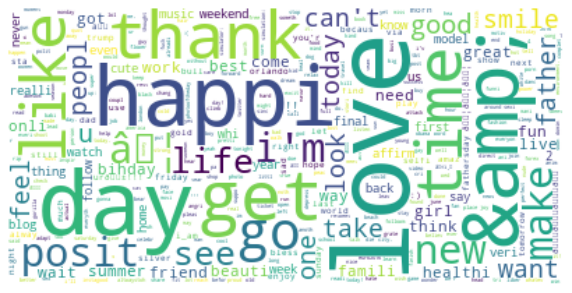

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
# get individual words
words = []
for line in data["new_tweet"]: 
 words.extend(line)
 
# create a word frequency dictionary
wordfreq = Counter(words)
# draw a Word Cloud with word frequencies
wordcloud = WordCloud(
 background_color="white",
 max_words=2000,
 stopwords=stopwords
 ).generate_from_frequencies(wordfreq)
plt.figure(figsize=(10,9))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

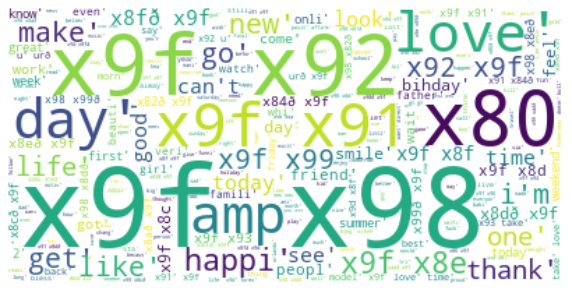

In [ ]:
positive = [r for r in data['new_tweet'][data['label']==0]]

pos = ''.join(str(v) for v in positive)#''.join(positive)
# draw a Word Cloud with word frequencies
wordcloud = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords
   ).generate(pos)
plt.figure(figsize=(10,9))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

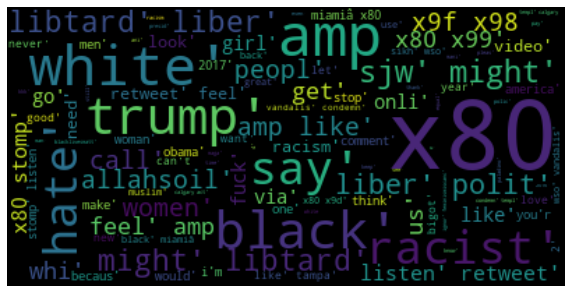

In [ ]:
negative = [r for r in data['new_tweet'][data['label']==1]]
neg = ''.join(str(v) for v in negative)
# draw a Word Cloud with word frequencies
wordcloud = WordCloud(
    background_color='black',
    max_words=2000,
    stopwords=stopwords
   ).generate(neg)
plt.figure(figsize=(10,9))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [43]:
#Split data into training and testing sets 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MultiLabelBinarizer

x_train, x_test, y_train, y_test =     train_test_split(data["new_tweet"], 
      data["label"], test_size = 0.2, random_state = 42)

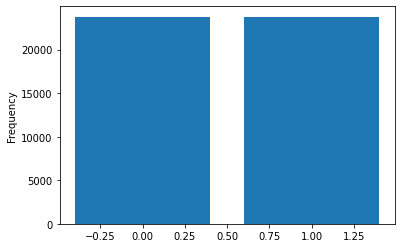

,new_tweet,label
0,"[becaus, â¦, years., attent, pay, past, year/...",1
1,"[raft, fun, badg, guid, build, gmw, outdoor, p...",0
2,"[beard, ð, gaymen, gdegblog, fullnessâ¦, ð...",0
3,"[true, fashion, fact]",0
4,"[design, gracious, jewelry!, share, simple,, b...",0


In [44]:
from imblearn.over_sampling import RandomOverSampler
sampler = RandomOverSampler()
x_train_blanaced, y_train_balanced = sampler.fit_resample(np.array(x_train).reshape(-1,1), list(y_train))
data = x_train_blanaced
label = y_train_balanced
class_dist = pd.Series(label).value_counts()
plt.bar(class_dist.index, class_dist)
plt.ylabel("Frequency")
plt.show()
data.flatten()
data = pd.DataFrame(data, columns = ['new_tweet'])
data['label'] = y_train_balanced
data.head()

In [45]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

count_vect = CountVectorizer(stop_words='english')
transformer = TfidfTransformer(norm='l2',sublinear_tf=True)
xd = pd.Series(x_train_blanaced.flatten())
text = xd.map(' '.join)
x_train_counts = count_vect.fit_transform(text)
x_train_tfidf = transformer.fit_transform(x_train_counts)
print(x_train_counts.shape)
print(x_train_tfidf.shape)
#Output :(25569, 27304) (25569, 27304)
text = x_test.map(' '.join)
x_test_counts = count_vect.transform(text)
x_test_tfidf = transformer.transform(x_test_counts)
print(x_test_counts.shape)
print(x_test_tfidf.shape)
#Output : (6393, 27304) (6393, 27304)

(47566, 33166)
(47566, 33166)
(6393, 33166)
(6393, 33166)


In [ ]:
def split_folds(data, target, L):
    perm = np.random.permutation(range(len(target)))
    print("here 1")
    #print(np.array_split(data[perm], 2))
    #X_folds = np.array_split(data[perm], L)
    print("her 2", target[2])
    y_folds = np.array_split(target[perm], L)
    print("her 3")
    
    return X_folds, y_folds

In [ ]:
def cross_validate(data, target, k, L):
        Ls = [2, 5, 10]

        sklearn_knn = KNeighborsClassifier(n_neighbors=k)
        

        X_folds, y_folds = split_folds(data, target, L)
        error_rates_own = []
        error_rates_sklearn = []
        for n in range(L):
            # construct train and test set from folds
            X_train_f = np.concatenate([X_folds[i].toarray() for i in range(L) if i != n])
            X_test_f = X_folds[n]
            y_train_f = np.concatenate([y_folds[i].toarray() for i in range(L) if i != n])
            y_test_f = y_folds[n]
            # run our own nearest neighbor classifier
            #result_own = k_nearest_neighbors(X_train_f, y_train_f, X_test_f, k)
            #error_rates_own.append( 100 * (1 - np.count_nonzero(result_own == y_test_f) / len(result_own)))
            # run sklearn's nearest neighbor classifier
            sklearn_knn.fit(X_train_f, y_train_f)
            result_sklearn = sklearn_knn.predict(X_test_f)
            error_rates_sklearn.append(100* (1- np.count_nonzero(result_sklearn == y_test_f) / len(result_sklearn)))

        return np.mean(error_rates_own), np.std(error_rates_own), np.mean(error_rates_sklearn), np.std(error_rates_sklearn)

In [ ]:
# run experiments for say k=5
Ls = [2,5,10]
from sklearn.neighbors import KNeighborsClassifier
Ls = [2, 5, 10]
ks = [1, 5]
values = np.zeros((len(ks), len(Ls), 4)) # k, L, results
for i, k in enumerate(ks):
    for j, L in enumerate(Ls):
      values[i, j, :] = cross_validate(x_train_tfidf, y_train_balanced, k, L)

here 1
her 2 0


TypeError: ignored

In [ ]:
from sklearn.model_selection import StratifiedKFold
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
sklearn_knn = KNeighborsClassifier(n_neighbors=2)
for train_indices, test_indices in cv.split(x_train_tfidf, y_train_balanced):
    display(test_indices)
    
    train_data = x_train_tfidf[train_indices]
    train_target = y_train_balanced[train_indices]
    
    #dt.fit(train_data, train_target)
    sklearn_knn.fit(train_data, train_target)
    test_data = data[test_indices]
    test_target = y_train_balanced[test_indices]
    
    #test_prediction = dt.predict(test_data)
    result_sklearn = sklearn_knn.predict(test_data)

array([    2,     8,    15, ..., 47548, 47549, 47563])

TypeError: ignored

In [ ]:
def test_classifier(x_test, y_test, classifier_callback):
    error = classifier_callback(x_test) != y_test
    return np.mean(error)

In [ ]:
def split_folds(data, target, L):
    X_folds = []
    Y_folds = []
    #indices based on rows
    fold_indices = np.arange(data.shape[0])
    #shuffle and split indices
    folds = np.array_split(np.random.permutation(fold_indices), L)

    for fold in folds:
        X_folds.append(data[fold])
        Y_folds.append(target[fold])
        
    return X_folds, Y_folds

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

Ls = [2,5,10]
ks = [1,5,33]
# shape: classifier X k X L X [errors]
errors = {'diy' : {}, 'sk' : {}}
for k in ks:
    errors['diy'][k] = {}
    errors['sk'][k] = {}
    for L in Ls:
        errors['diy'][k][L] = []
        errors['sk'][k][L] = []

for L in Ls:
    X_folds, Y_folds = split_folds(x_train_tfidf, np.array(y_train_balanced), L)
    fold_count = len(X_folds)
    for pick in range(fold_count):
        test_set_x = X_folds[pick]
        test_set_y = Y_folds[pick]
        train_set_x = np.concatenate(X_folds[:pick] + X_folds[pick+1:])
        train_set_y = np.concatenate(Y_folds[:pick] + Y_folds[pick+1:])
        for k in ks:
            #diy_classifier = KNearestNeighbour(train_set_x, train_set_y, k)
            #error = test_classifier(test_set_x, test_set_y, diy_classifier.predict)
            errors['diy'][k][L].append(error)

            sk_classifier = KNeighborsClassifier(n_neighbors = k)
            sk_classifier.fit(train_set_x, train_set_y)
            error = test_classifier(test_set_x, test_set_y, sk_classifier.predict)
            errors['sk'][k][L].append(error)
          

ValueError: ignored

In [46]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=3)
model.fit(x_train_tfidf,y_train_balanced)
predictions = model.predict(x_test_tfidf)
#Confusion Matrix 
from sklearn.metrics import confusion_matrix,f1_score
confusion_matrix(y_test,predictions)
#Output: array([[5898,   39],        
#               [ 207,  249]], dtype=int64)
#f1-score
print(f1_score(y_test,predictions))
#Output : 0.6693548387096774
#Accuracy_score
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predictions)*100
# output:96.15204129516658

0.5125


95.11966213045518

In [ ]:
len(y_train_balanced)
x_train_tfidf.shape

(47566, 33166)

In [51]:
from sklearn.metrics import f1_score
f1_score(y_test,predictions, average='macro')

0.7434062654371809

In [ ]:
from scipy import sparse
# Stack matrices horizontally (column wise) using hstack().
trainX_tfidf = sparse.hstack([x_train_tfidf, x_train_tfidf])

# Convert Spare Matrix into an Array using toarray() 
trainX_tfidf_arr = trainX_tfidf.toarray()

# Concatenate TF-IDF and Cosine Similarity using numpy.c_[], 
# which is just another column stack.
trainX_tfidf_cos = np.c_[trainX_tfidf_arr, trainX_tfidf_arr]
trainX_tfidf_cos